<a href="https://colab.research.google.com/github/marcocaramanti/MLPNS_MCaramanti/blob/main/higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Higgs boson search

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# pip install kaggle

- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data

Data Dictionary (Dataset semantics) http://opendata.cern.ch/record/328


In [5]:
cd drive/My\ Drive

/content/drive/My Drive


In [6]:
# envs = json.load(open("kaggle.json", "r"))

# os.environ["KAGGLE_USERNAME"] = envs["username"]
# os.environ["KAGGLE_KEY"] = envs["key"]

In [7]:
cd MLPNS2023/

/content/drive/My Drive/MLPNS2023


In [8]:
# !mkdir higgsBoson

In [9]:
cd higgsBoson

/content/drive/My Drive/MLPNS2023/higgsBoson


In [10]:
# !kaggle competitions download -c higgs-boson

In [11]:
# !unzip higgs-boson.zip

In [12]:
# !ls

In [13]:
# !unzip training.zip

In [14]:
# !unzip test.zip


- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [15]:
higgsdata = pd.read_csv("training.csv")

In [16]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [17]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


<ipython-input-18-c5086f163cc7>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  ax = pl.figure(figsize=(5,5)).add_subplot(111)


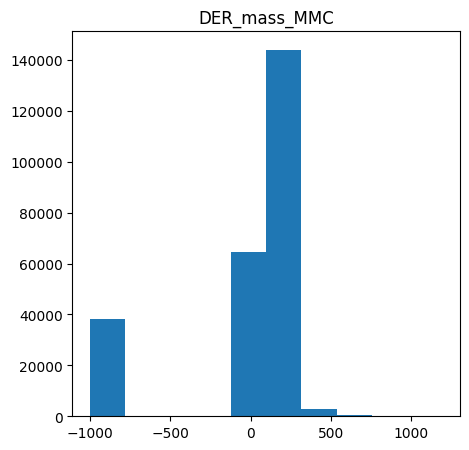

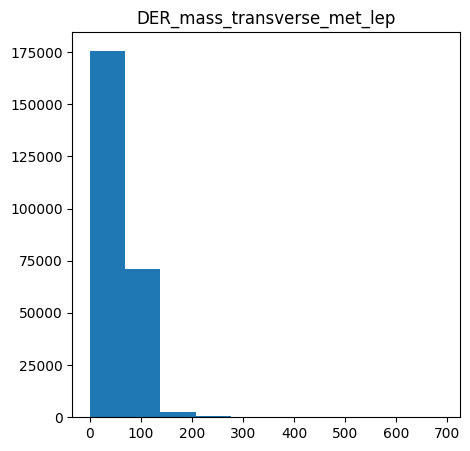

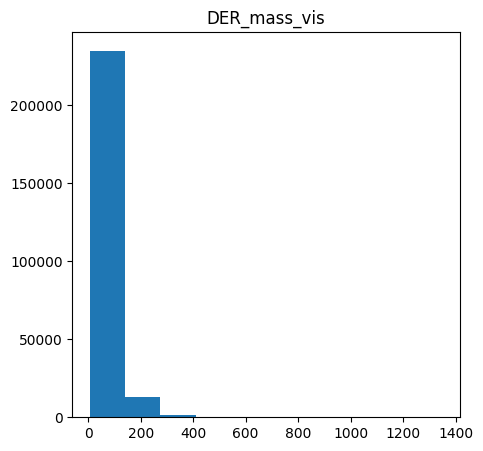

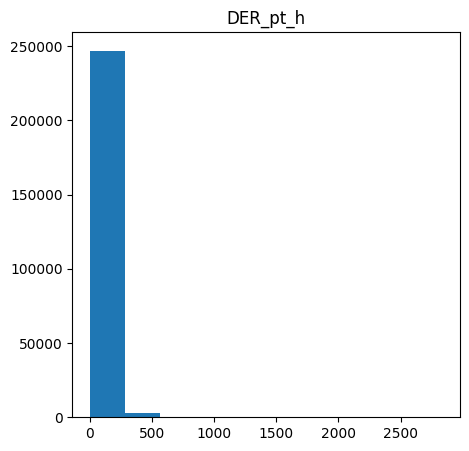

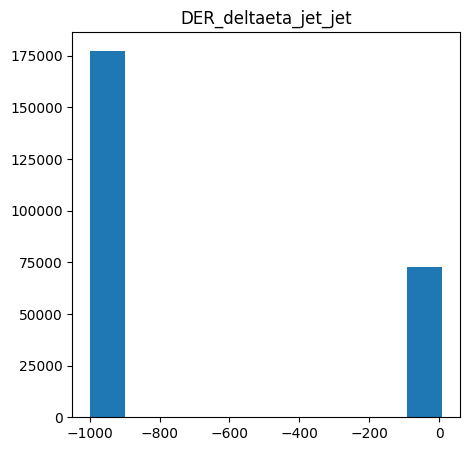

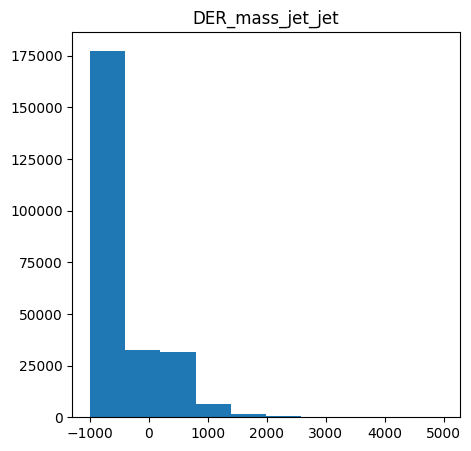

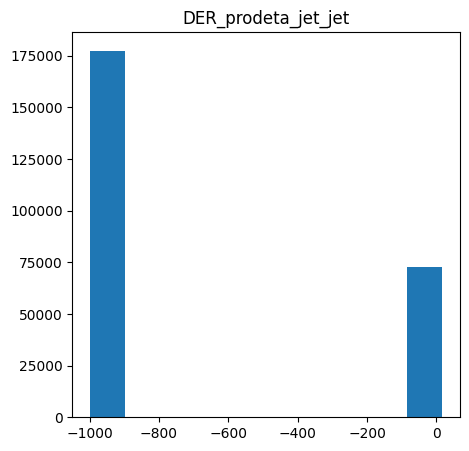

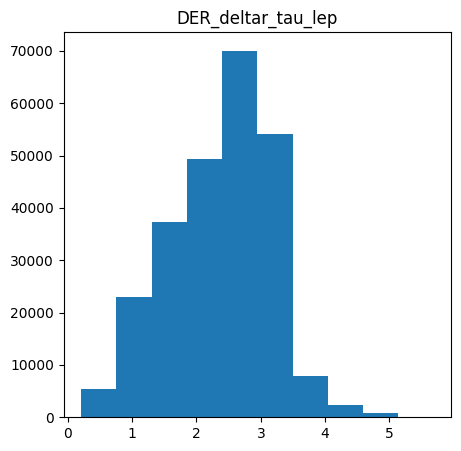

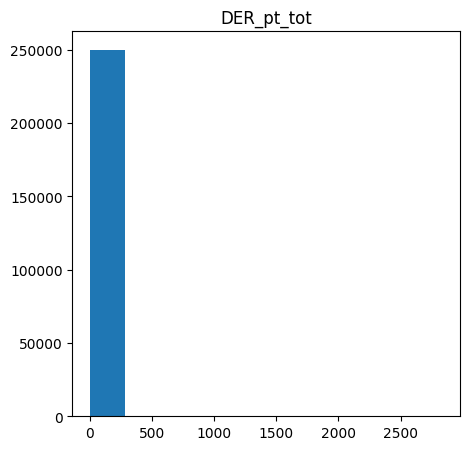

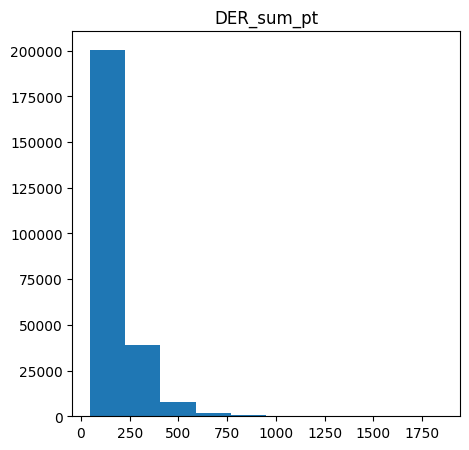

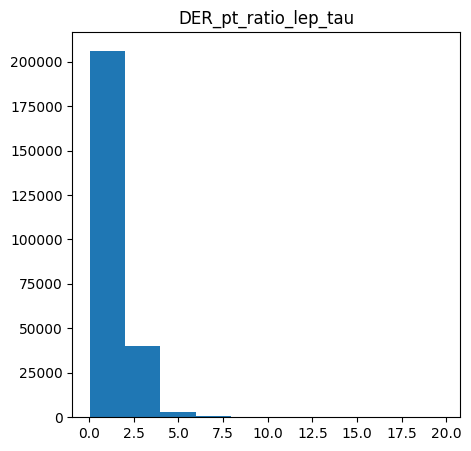

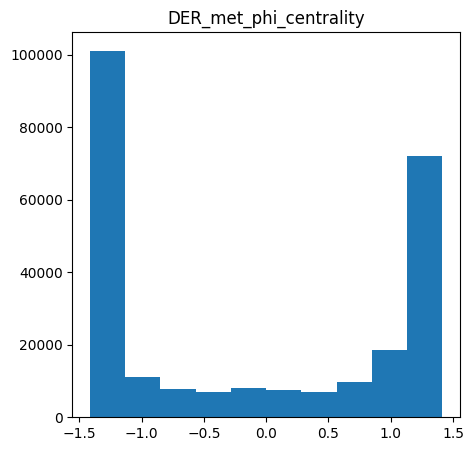

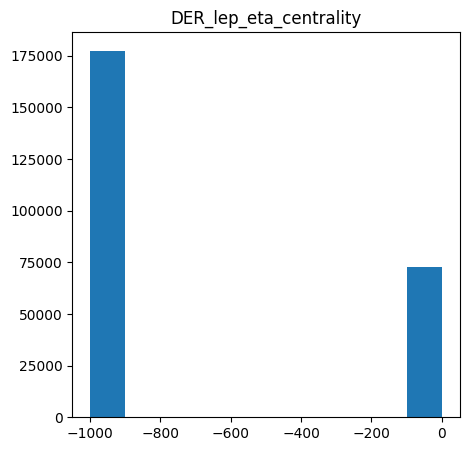

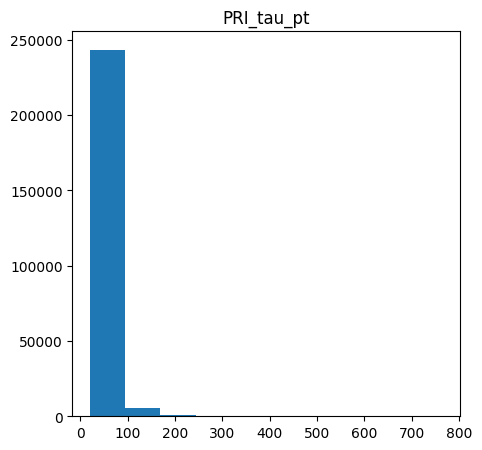

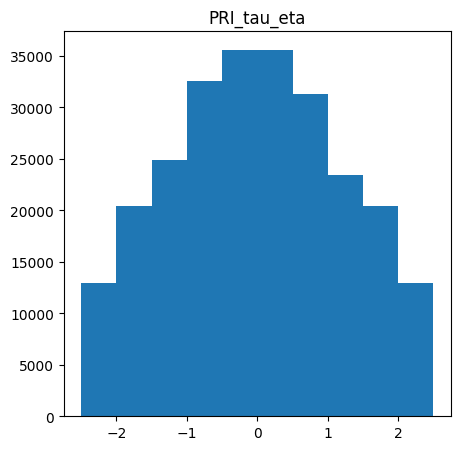

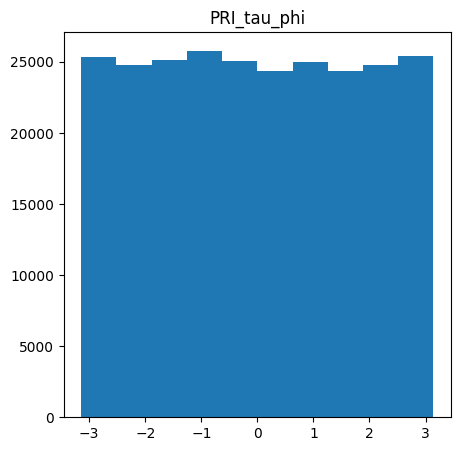

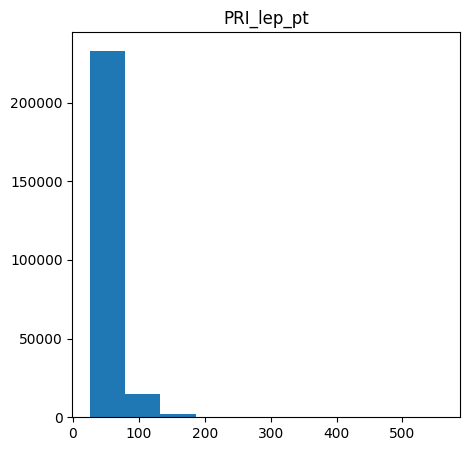

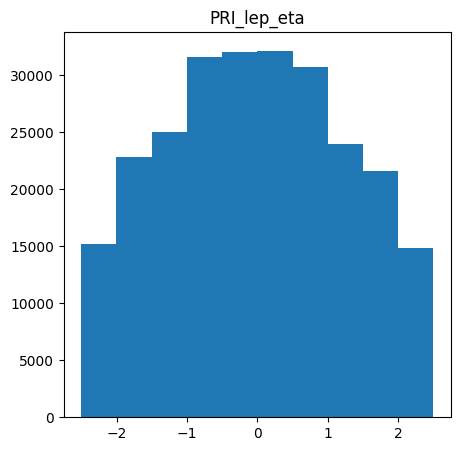

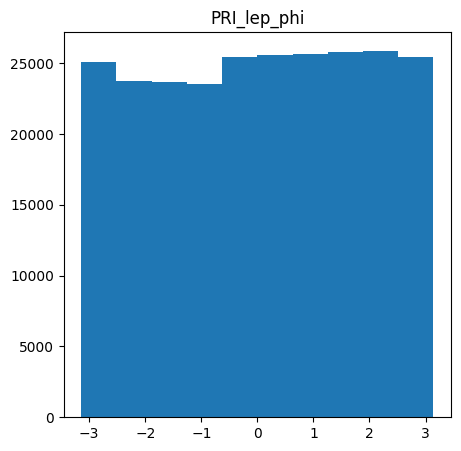

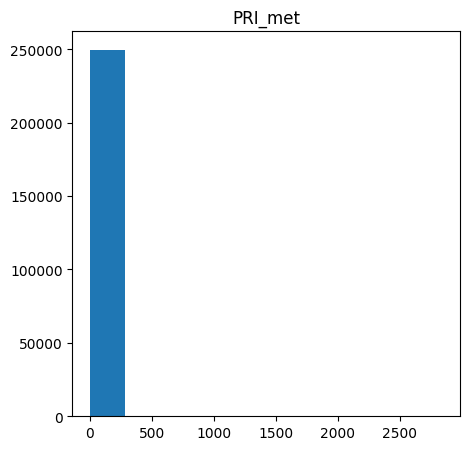

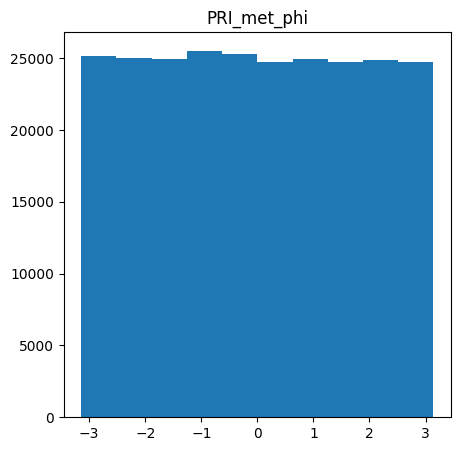

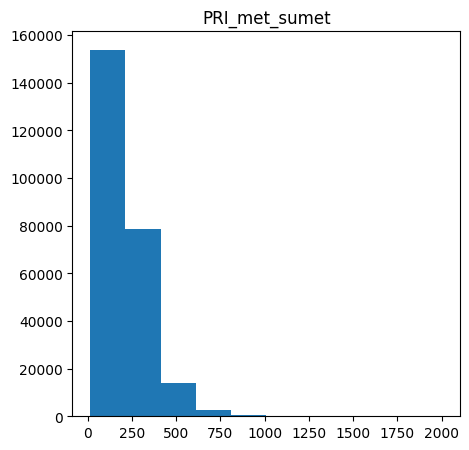

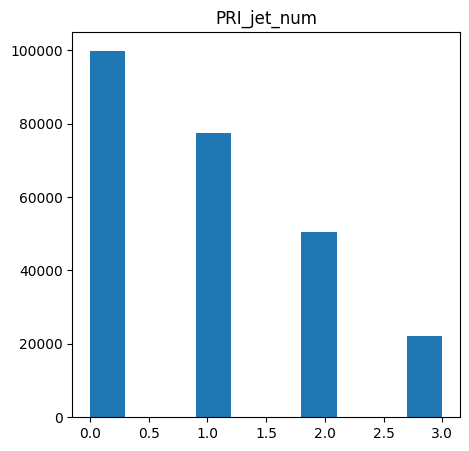

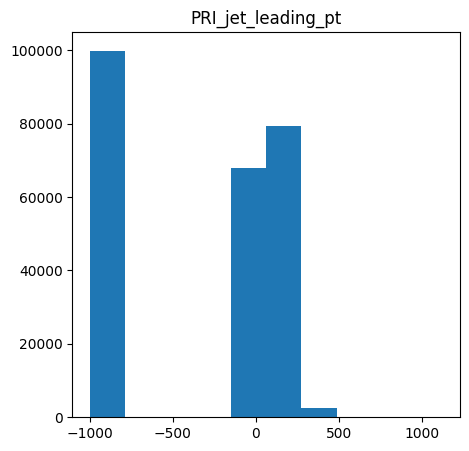

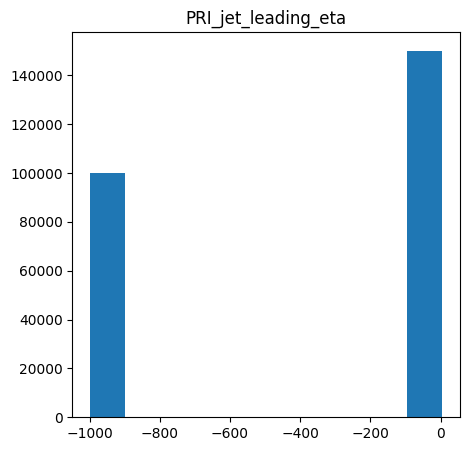

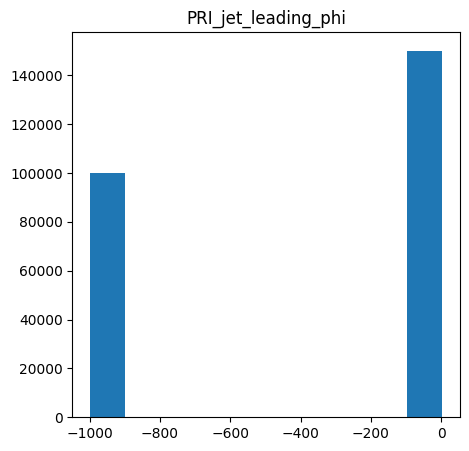

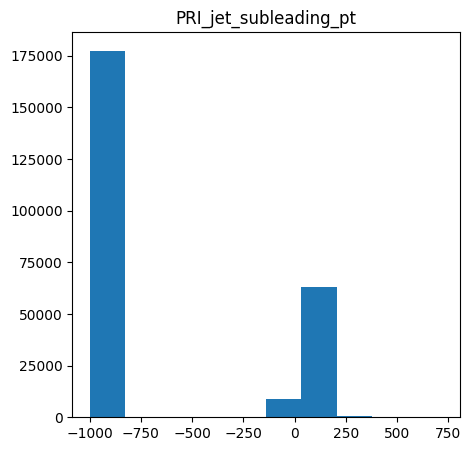

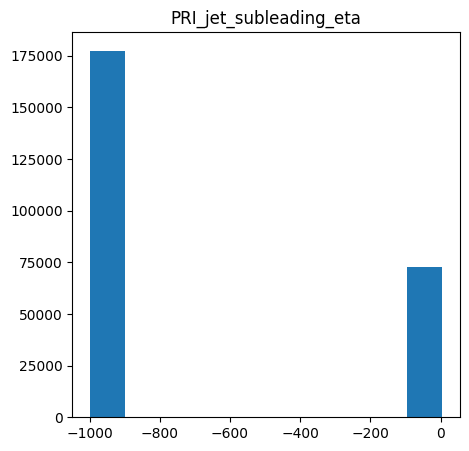

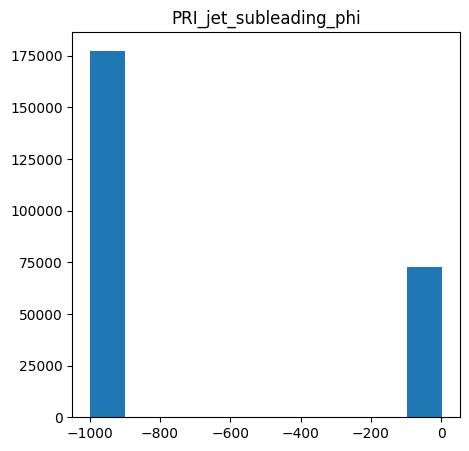

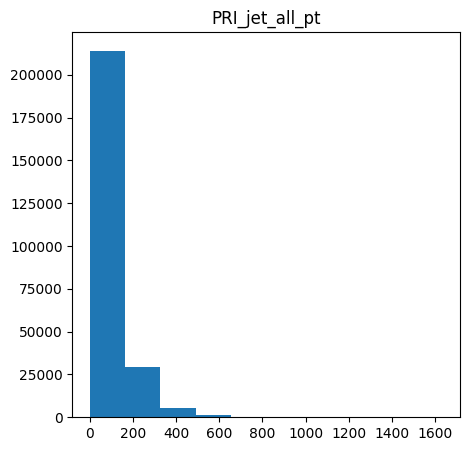

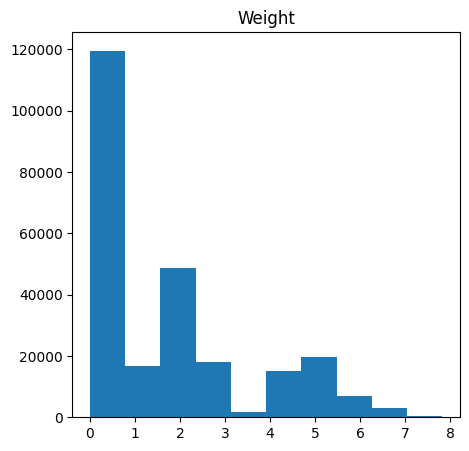

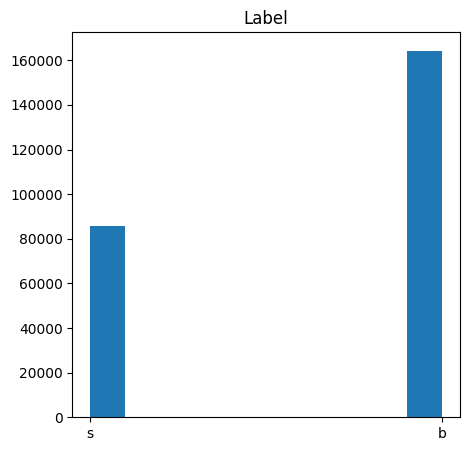

In [18]:
for c in higgsdata.columns[1:]:
  ax = pl.figure(figsize=(5,5)).add_subplot(111)
  ax.hist(higgsdata[:][c])
  pl.title(c)

We notice that in certain columns many datapoint take the value -999. Actually in this dataset -999 is used as NaN. This means that there are missing data and we need to take care of them.

In [19]:
(higgsdata==-999).sum()

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

In [20]:
# We replace -999 with NaN

higgsdata.replace(-999, np.nan, inplace=True)
higgsdata

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,b
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,NaN,71.989,36.548,5.042,NaN,NaN,NaN,1.392,5.042,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,4.505083,b
249996,349996,NaN,58.179,68.083,22.439,NaN,NaN,NaN,2.585,22.439,...,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,NaN,NaN,NaN,2.390,22.183,...,1,41.992,1.800,-0.166,NaN,NaN,NaN,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,NaN,NaN,NaN,3.365,13.504,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,1.681611,b


In [21]:
# We decide to delete datapoints with missing values

higgsdata.dropna(axis=0, inplace=True)

In [22]:
higgsdata.shape

(68114, 33)

In [23]:
(higgsdata == np.NaN).sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [24]:
# Now we extract the target features and prepare the data for classification

labels = higgsdata["Label"].values

In [25]:
weights = higgsdata["Weight"].values

In [26]:
# Let us remove the Weight and Label columns from the dataframe

higgsdata.drop(["Weight", "Label"], axis=1, inplace=True)

In [27]:
# We also remove the EventId column

higgsdata.drop(["EventId"], axis=1, inplace=True)

In [28]:
higgsdata.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
11,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,...,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
23,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,...,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009


In [29]:
higgsdata.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,...,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000
mean,122.816184,35.270300,78.496815,111.430393,2.434232,378.176455,-0.881020,1.996525,27.356644,281.524727,...,0.006987,334.677667,2.303711,106.879969,-0.005791,-0.011564,57.915426,-0.012930,-0.004782,183.374631
std,60.751559,30.750262,40.728784,76.318688,1.750700,400.784254,3.592624,0.774636,28.266913,130.245426,...,1.813892,139.867044,0.459863,68.165852,1.746442,1.809276,32.224318,2.044065,1.817247,108.312736
min,9.878000,0.000000,7.330000,0.120000,0.000000,13.602000,-18.066000,0.228000,0.004000,110.601000,...,-3.142000,34.323000,2.000000,30.196000,-4.497000,-3.142000,30.000000,-4.500000,-3.142000,60.223000
25%,93.320250,11.320000,57.274250,57.827000,0.897000,113.463000,-2.729000,1.397000,4.218000,192.844250,...,-1.550000,239.168250,2.000000,60.844500,-1.339000,-1.574000,37.392250,-1.628750,-1.579000,109.472000
50%,113.230000,26.964000,70.930000,94.714000,2.146500,232.370500,-0.284000,1.940000,22.542000,246.719500,...,0.005000,305.170000,2.000000,87.369000,0.000000,-0.032000,48.105500,-0.014000,-0.008000,154.136500
75%,133.455750,52.202750,88.372000,145.824750,3.741000,489.447750,0.921000,2.574000,39.067750,331.105000,...,1.573000,396.382500,3.000000,131.069000,1.330000,1.558000,66.946500,1.604000,1.573000,223.595250
max,988.199000,594.287000,789.538000,1053.807000,8.503000,4974.979000,16.648000,5.579000,466.525000,1852.462000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [30]:
labels

array(['s', 'b', 's', ..., 's', 's', 'b'], dtype=object)

In [31]:
np.unique(labels)

array(['b', 's'], dtype=object)

In [32]:
weights

array([0.00265331, 0.08341403, 0.00265331, ..., 0.01863612, 0.0015027 ,
       0.06406078])

In [33]:
from sklearn.model_selection import train_test_split 

In [34]:
xl_train, xl_test, yl_train, yl_test = train_test_split(
    higgsdata.values, labels, test_size=0.2
)

In [35]:
xw_train, xw_test, yw_train, yw_test = train_test_split(
    higgsdata.values, weights, test_size=0.2
)

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [36]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf0 = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(rf0.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [37]:
gbt = GradientBoostingClassifier(random_state=0)
print('Parameters currently in use:\n')
print(gbt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [38]:
rf0.fit(xl_train, yl_train)
gbt.fit(xl_train, yl_train)

GradientBoostingClassifier(random_state=0)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [39]:
print("RANDOM FOREST")
print("Performarnce on training set: ")
print("{0:.5f}".format(rf0.score(xl_train, yl_train)))
print("Performance on test set: ")
print("{0:.5f}".format(rf0.score(xl_test, yl_test)))

RANDOM FOREST
Performarnce on training set: 
0.99998
Performance on test set: 
0.84020


In [40]:
print("GRADIENT BOOSTED TREE")
print("Performarnce on training set: ")
print("{0:.5f}".format(gbt.score(xl_train, yl_train)))
print("Performance on test set: ")
print("{0:.5f}".format(gbt.score(xl_test, yl_test)))

GRADIENT BOOSTED TREE
Performarnce on training set: 
0.84697
Performance on test set: 
0.83939


We notice that the GBT model has the same performance on the training and test set, whereas the RF model has a significantly worse performance on the test set compared to the training set. This is a signal of overfitting for the RF model, due to the fact that we didn't set a maximum depth for the trees. Therefore we need to run the model again setting a maximum depth.

In [41]:
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(xl_train, yl_train)
print("RANDOM FOREST (max_depth=4)")
print("Performarnce on training set: ")
print("{0:.5f}".format(rf.score(xl_train, yl_train)))
print("Performance on test set: ")
print("{0:.5f}".format(rf.score(xl_test, yl_test)))

RANDOM FOREST (max_depth=4)
Performarnce on training set: 
0.82742
Performance on test set: 
0.82133


This time the models performs the same of both datasets. However, the performance on the test set has become worse.

Another aspect worth mentioning is that GBT performs better that RF.

- Produce a confusion matrix for each model and compare them


 



In [42]:

# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    # plot it
    fig, ax = pl.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    pl.text(0,0, "%f"%cm[0][0], ha="center")
    pl.text(1,1, "%f"%cm[1][1], ha="center")
    pl.text(0,1, "%f"%cm[1][0], color="w", ha="center")
    pl.text(1,0, "%f"%cm[0][1], color="w", ha="center")
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    pl.colorbar(im, cax=cax)
    

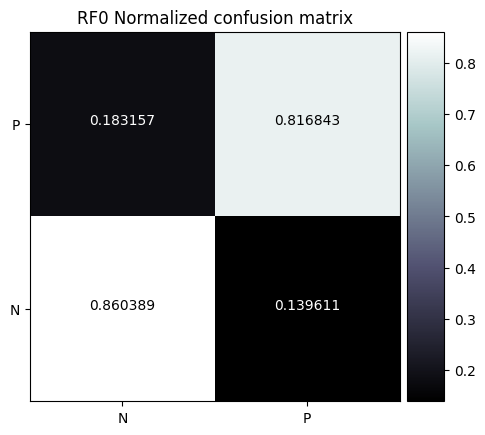

In [43]:
plot_confusion_matrix(yl_test, rf0.predict(xl_test), normalize="true", 
                      title="RF0")

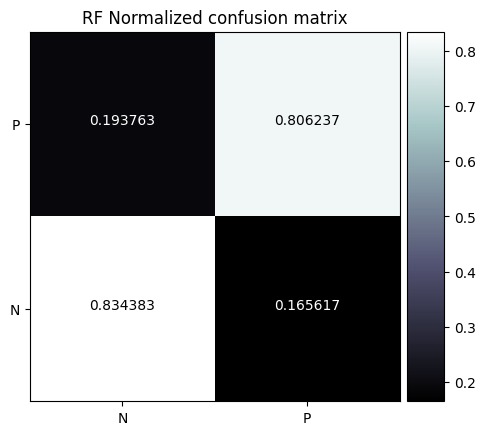

In [44]:
plot_confusion_matrix(yl_test, rf.predict(xl_test), normalize="true", 
                      title="RF")

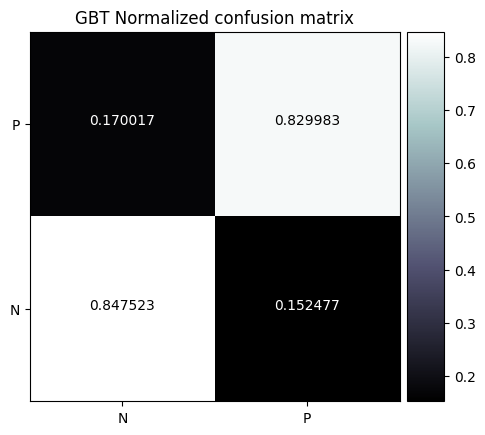

In [45]:
plot_confusion_matrix(yl_test, gbt.predict(xl_test), normalize="true", 
                      title="GBT")

We see that the GBT models performs generally better; however, there are no dramatic changes in performance between the two models.


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test sets


In [46]:
from sklearn.ensemble import RandomForestRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rfR.fit(xw_train, yw_train)

RandomForestRegressor(max_depth=3, random_state=0)

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gbtR = GradientBoostingRegressor(n_estimators=100, max_depth=3,
                                 random_state=0)
gbtR.fit(xw_train, yw_train)

GradientBoostingRegressor(random_state=0)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [48]:
def l1(a, b):
  return np.abs(a-b).sum()

def l2(a, b):
  return np.sum((a - b)**2)

In [49]:
print("L1 RF: {0:.5f}".format(l1(yw_test, rfR.predict(xw_test))))
print("L1 GBT: {0:.5f}".format(l1(yw_test, gbtR.predict(xw_test))))

L1 RF: 5748.96971
L1 GBT: 4873.21609


In [50]:
print("L2 RF: {0:.5f}".format(l2(yw_test, rfR.predict(xw_test))))
print("L2 GBT: {0:.5f}".format(l2(yw_test, gbtR.predict(xw_test))))

L2 RF: 5466.70027
L2 GBT: 4326.72577


Again, we see that GBT performs better than RF.

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [51]:
important_feature_index = np.argsort(rf.feature_importances_)[-4:]

higgsdata.iloc[:, important_feature_index]

,DER_deltaeta_jet_jet,DER_prodeta_jet_jet,DER_mass_vis,DER_mass_MMC
0,0.910,2.666,97.827,138.470
5,2.636,-0.540,59.149,89.744
6,0.733,0.113,107.782,148.754
11,2.563,-1.401,75.712,114.744
23,1.955,-0.923,111.581,141.481
...,...,...,...,...
249976,3.189,-2.384,92.603,137.371
249980,0.660,1.836,88.751,119.934
249985,1.000,-0.240,95.258,126.151
249993,0.936,-0.207,66.781,130.075


In [64]:
random_grid = {
    'max_depth': [3, 10, None],
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [10, 100, 1000],
    'bootstrap': [True, False]}
  
print(random_grid)


{'max_depth': [3, 10, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [10, 100, 1000], 'bootstrap': [True, False]}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations

random_search = RandomizedSearchCV(estimator = rf0,
                                   param_distributions=random_grid, n_iter=36, 
                                   cv=3, verbose=3, random_state=0)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [55]:
# We need to keep only the "important features" in the training dataset

xl_train.shape

(54491, 30)

In [56]:
xl_train2 = xl_train[:, important_feature_index]
xl_train2.shape

(54491, 4)

In [57]:
yl_train.shape

(54491,)

In [66]:
random_search.fit(xl_train2, yl_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=10;, score=0.786 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=10;, score=0.786 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=10;, score=0.788 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=100;, score=0.788 total time=   2.9s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=100;, score=0.789 total time=   3.6s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=100;, score=0.788 total time=   3.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=1000;, score=0.788 total time=  30.6s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=1000;, score=0.790 total time=  30.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=1000;, score=0.788 total time=  30.7s
[CV 1/3] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.786 total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.786 total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.788 total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=100;, score=0.788 total time=   3.6s
[CV 2/3] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=100;, score=0.789 total time=   3.4s
[CV 3/3] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=100;, score=0.788 total time=   2.9s
[CV 1/3] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=1000;, score=0.788 total time=  30.3s
[CV 2/3] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=1000;, score=0.790 total time=  31.2s
[

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=10;, score=0.802 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=10;, score=0.804 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=10;, score=0.800 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=100;, score=0.804 total time=   7.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=100;, score=0.807 total time=   8.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=100;, score=0.803 total time=   7.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=1000;, score=0.803 total time= 1.3min


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=1000;, score=0.806 total time= 1.3min


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=1000;, score=0.803 total time= 1.3min
[CV 1/3] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=10;, score=0.802 total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=10;, score=0.804 total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=10;, score=0.800 total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.804 total time=   7.4s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.807 total time=   8.3s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.803 total time=   8.0s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=1000;, score=0.803 total time= 1.3min
[CV 2/3] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=1000;, score=0.806 total time=

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=10;, score=0.775 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=10;, score=0.779 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=10;, score=0.776 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=100;, score=0.794 total time=  12.8s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=100;, score=0.797 total time=  12.8s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=100;, score=0.793 total time=  12.8s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=1000;, score=0.794 total time= 2.1min


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=1000;, score=0.797 total time= 2.2min


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=1000;, score=0.794 total time= 2.1min
[CV 1/3] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.775 total time=   1.2s
[CV 2/3] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.779 total time=   1.2s
[CV 3/3] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.776 total time=   1.2s
[CV 1/3] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.794 total time=  12.8s
[CV 2/3] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.797 total time=  12.9s
[CV 3/3] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.793 total time=  12.8s
[CV 1/3] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=1000;, score=0.794 total time= 2.1min
[CV 2/3] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=1000;, score

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=3, max_features=auto, n_estimators=10;, score=0.782 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=3, max_features=auto, n_estimators=10;, score=0.788 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=3, max_features=auto, n_estimators=10;, score=0.788 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=3, max_features=auto, n_estimators=100;, score=0.789 total time=   3.7s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=3, max_features=auto, n_estimators=100;, score=0.788 total time=   3.7s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=3, max_features=auto, n_estimators=100;, score=0.788 total time=   5.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=3, max_features=auto, n_estimators=1000;, score=0.788 total time=  39.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=3, max_features=auto, n_estimators=1000;, score=0.788 total time=  40.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=3, max_features=auto, n_estimators=1000;, score=0.788 total time=  40.1s
[CV 1/3] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.782 total time=   0.4s
[CV 2/3] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.788 total time=   0.4s
[CV 3/3] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.788 total time=   0.4s
[CV 1/3] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=100;, score=0.789 total time=   3.8s
[CV 2/3] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=100;, score=0.788 total time=   4.8s
[CV 3/3] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=100;, score=0.788 total time=   3.7s
[CV 1/3] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=1000;, score=0.788 total time=  39.9s
[CV 2/3] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=1000;, score=0.788 total time=

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, n_estimators=10;, score=0.801 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, n_estimators=10;, score=0.804 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, n_estimators=10;, score=0.800 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, n_estimators=100;, score=0.802 total time=  10.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, n_estimators=100;, score=0.806 total time=  11.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, n_estimators=100;, score=0.800 total time=  11.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, n_estimators=1000;, score=0.803 total time= 1.9min


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, n_estimators=1000;, score=0.805 total time= 1.8min


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, n_estimators=1000;, score=0.802 total time= 1.9min
[CV 1/3] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=10;, score=0.801 total time=   1.6s
[CV 2/3] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=10;, score=0.804 total time=   1.5s
[CV 3/3] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=10;, score=0.800 total time=   1.3s
[CV 1/3] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.802 total time=  10.5s
[CV 2/3] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.806 total time=  11.2s
[CV 3/3] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.800 total time=  11.4s
[CV 1/3] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=1000;, score=0.803 total time= 1.9min
[CV 2/3] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=1000;, score=0.805 to

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=10;, score=0.770 total time=   2.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=10;, score=0.771 total time=   2.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=10;, score=0.772 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=100;, score=0.782 total time=  19.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=100;, score=0.785 total time=  20.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=100;, score=0.782 total time=  19.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=1000;, score=0.784 total time= 3.2min


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=1000;, score=0.785 total time= 3.3min


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=1000;, score=0.783 total time= 3.2min
[CV 1/3] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.770 total time=   1.8s
[CV 2/3] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.771 total time=   1.8s
[CV 3/3] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.772 total time=   1.8s
[CV 1/3] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.782 total time=  20.3s
[CV 2/3] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.785 total time=  19.4s
[CV 3/3] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.782 total time=  19.0s
[CV 1/3] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=1000;, score=0.784 total time= 3.2min
[CV 2/3] END bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=100

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=36,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100, 1000]},
                   random_state=0, verbose=3)

In [67]:
random_search.best_params_

{'n_estimators': 100,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [68]:
print("Tuned RF Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))


Tuned RF Parameters: {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Best score is 0.8048301290374772


In [69]:
df = pd.DataFrame(random_search.cv_results_)

In [70]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.307624,0.005436,0.046945,0.002665,10,auto,3,True,"{'n_estimators': 10, 'max_features': 'auto', '...",0.786170,0.786005,0.787700,0.786625,0.000763,25
1,3.139282,0.287631,0.181116,0.035971,100,auto,3,True,"{'n_estimators': 100, 'max_features': 'auto', ...",0.787877,0.789474,0.788251,0.788534,0.000682,19
2,29.270375,0.189930,1.260585,0.010868,1000,auto,3,True,"{'n_estimators': 1000, 'max_features': 'auto',...",0.787712,0.790079,0.788306,0.788699,0.001006,17
3,0.295082,0.005036,0.045075,0.001201,10,sqrt,3,True,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.786170,0.786005,0.787700,0.786625,0.000763,25
4,3.107152,0.275324,0.178885,0.030931,100,sqrt,3,True,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.787877,0.789474,0.788251,0.788534,0.000682,19
5,29.306412,0.448109,1.323031,0.088509,1000,sqrt,3,True,"{'n_estimators': 1000, 'max_features': 'sqrt',...",0.787712,0.790079,0.788306,0.788699,0.001006,17
6,1.045389,0.014131,0.089864,0.001120,10,auto,10,True,"{'n_estimators': 10, 'max_features': 'auto', '...",0.802026,0.804063,0.800418,0.802169,0.001491,9
7,7.340901,0.581559,0.249250,0.000601,100,auto,10,True,"{'n_estimators': 100, 'max_features': 'auto', ...",0.804118,0.806981,0.803392,0.804830,0.001549,1
8,76.052728,0.171316,2.418637,0.139224,1000,auto,10,True,"{'n_estimators': 1000, 'max_features': 'auto',...",0.802852,0.806430,0.802731,0.804004,0.001716,3
9,0.733625,0.008840,0.055505,0.001804,10,sqrt,10,True,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.802026,0.804063,0.800418,0.802169,0.001491,9


# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [72]:
# Here we train the model with the best parameters found previously

rf_bp = RandomForestClassifier(n_estimators=100, max_features='auto',
                               max_depth=10, bootstrap=True)
rf_bp.fit(xl_train, yl_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto')

In [90]:
# In the following array we get for each datapoint in the test set the
# probability of being in class s or class b

y_pred_grd_rfcat = rf_bp.predict_proba(xl_test)

In [91]:
y_pred_grd_rfcat

array([[0.38159562, 0.61840438],
       [0.94383393, 0.05616607],
       [0.04965953, 0.95034047],
       ...,
       [0.44400285, 0.55599715],
       [0.69068698, 0.30931302],
       [0.27853587, 0.72146413]])

In [92]:
y_pred_grd_rfcat.shape

(13623, 2)

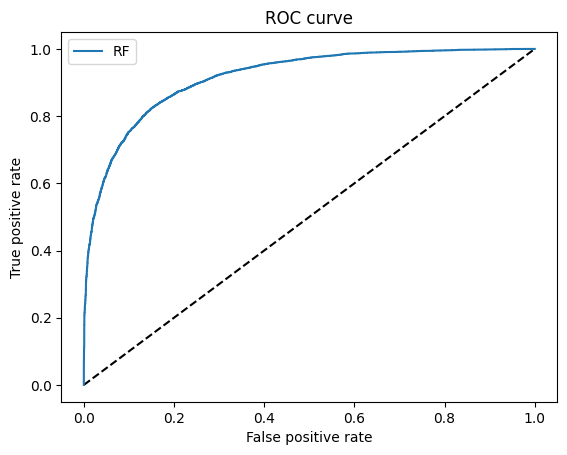

In [93]:
# The random forest model by itself
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, _ = roc_curve(yl_test=='s', y_pred_grd_rfcat[:,1])

pl.figure(1)
pl.plot([0, 1], [0, 1], 'k--')
pl.plot(fpr_rf, tpr_rf, label='RF')
pl.xlabel('False positive rate')
pl.ylabel('True positive rate')
pl.title('ROC curve')
pl.legend(loc='best')
pl.show()
